In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ecommerce_cleaned.csv", parse_dates=['Order_Date','Ship_Date'])
df.head()

,Order_ID,Order_Date,Customer_ID,Gender,City,State,Country,Product_ID,Product_Name,Category,...,Year,Month_Name,Month_NO,Profit_Margin,Profit_Margin_Check,Order_Yerar,Order_Month,Order_Month_Name,Days_To_Ship,Order_Year
0,1,2023-01-01,CUST3895,Male,Pune,Maharashtra,India,PROD244,Charger,Electronics,...,2023,January,1,11.046580,11.046580,2023,2023,January,5,2023
1,2,2023-01-01,CUST9444,Male,Kolkata,West Bengal,India,PROD768,Backpack,Fashion,...,2023,January,1,15.490971,15.490971,2023,2023,January,5,2023
2,3,2023-01-01,CUST5415,Female,Ahmedabad,Gujarat,India,PROD634,Mobile,Electronics,...,2023,January,1,24.365231,24.365231,2023,2023,January,2,2023
3,4,2023-01-01,CUST1542,Female,Bengaluru,Karnataka,India,PROD487,Notebook,Stationery,...,2023,January,1,8.396623,8.396623,2023,2023,January,2,2023
4,5,2023-01-01,CUST1015,Male,Bengaluru,Karnataka,India,PROD296,Charger,Electronics,...,2023,January,1,13.250749,13.250749,2023,2023,January,3,2023


In [9]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_profit_margin = df['Profit_Margin'].mean()
total_orders = df.shape[0]

print("Total Sales         :",round(total_sales,2))
print("Total Profit        :",round(total_profit,2))
print("Avg Profit Margin   :",round(avg_profit_margin,2),"%")
print("Total Orders        :",total_orders)

Total Sales         : 1137383324.1
Total Profit        : 170894307.05
Avg Profit Margin   : 15.01 %
Total Orders        : 20000


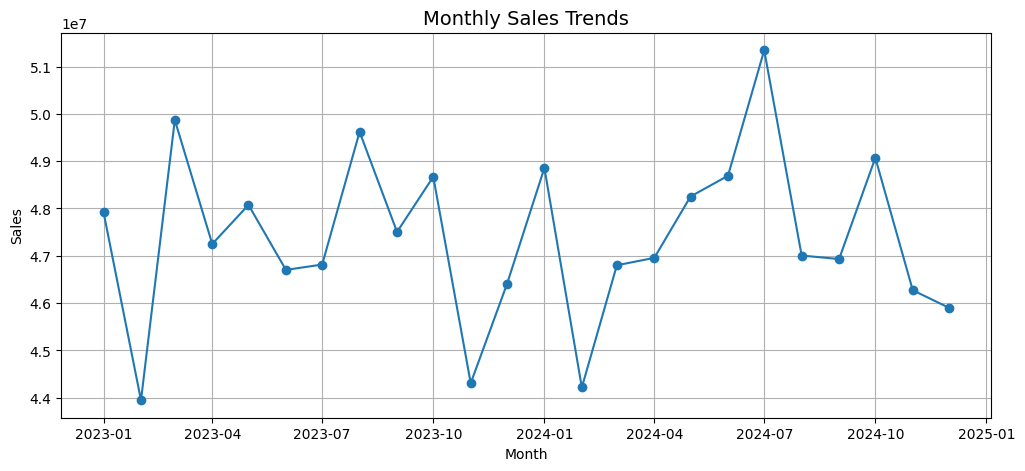

In [14]:
monthly_sales = df.groupby(['Order_Year','Order_Month']).agg({'Sales':'sum'}).reset_index()

monthly_sales['YearMonth'] = pd.to_datetime(
    monthly_sales['Order_Year'].astype(str) + '-' +
    monthly_sales['Order_Month'].astype(str) + '-01' ,
    format = '%Y-%m-%d'
)

monthly_sales = monthly_sales.sort_values('YearMonth')

plt.figure(figsize=(12,5))
plt.plot(monthly_sales['YearMonth'],monthly_sales['Sales'],marker = 'o')
plt.title("Monthly Sales Trends",fontsize = 14)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

In [11]:
df['Order_Year']=df['Order_Date'].dt.year
df['Order_Month']=df['Order_Date'].dt.month

df[['Order_Date','Order_Year','Order_Month']].head()


,Order_Date,Order_Year,Order_Month
0,2023-01-01,2023,1
1,2023-01-01,2023,1
2,2023-01-01,2023,1
3,2023-01-01,2023,1
4,2023-01-01,2023,1


In [15]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

category_sales = category_sales.sort_values(by = 'Sales',ascending = False)

category_sales

,Category,Sales
0,Electronics,7.605343e+08
1,Fashion,2.837031e+08
2,Stationery,9.314593e+07


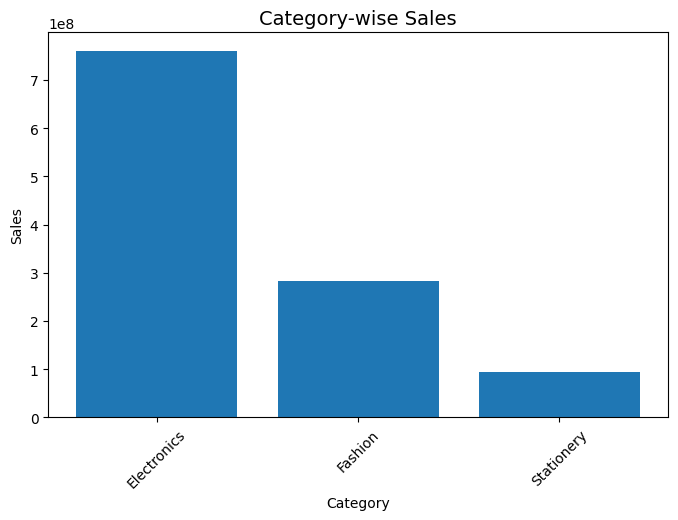

In [17]:
plt.figure(figsize=(8,5))
plt.bar(category_sales['Category'],category_sales['Sales'])
plt.title("Category-wise Sales",fontsize = 14)
plt.xlabel("Category")
plt.ylabel("Sales")
plt.xticks(rotation = 45)
plt.show()

In [18]:
top_products = (
    df.groupby(['Product_ID','Product_Name'])['Sales']
    .sum()
    .reset_index()
    .sort_values(by='Sales',ascending = False)
    .head(10)
)
top_products

,Product_ID,Product_Name,Sales
6945,PROD787,Television,728966.95
6897,PROD782,Notebook,717050.20
8538,PROD945,T-Shirt,685668.70
4698,PROD565,Charger,662706.90
5722,PROD666,Laptop,650729.25
247,PROD124,Power Bank,610802.30
723,PROD170,Washing Machine,592619.05
1937,PROD289,Washing Machine,590722.75
1233,PROD220,Television,564950.35
4354,PROD530,Television,546612.70


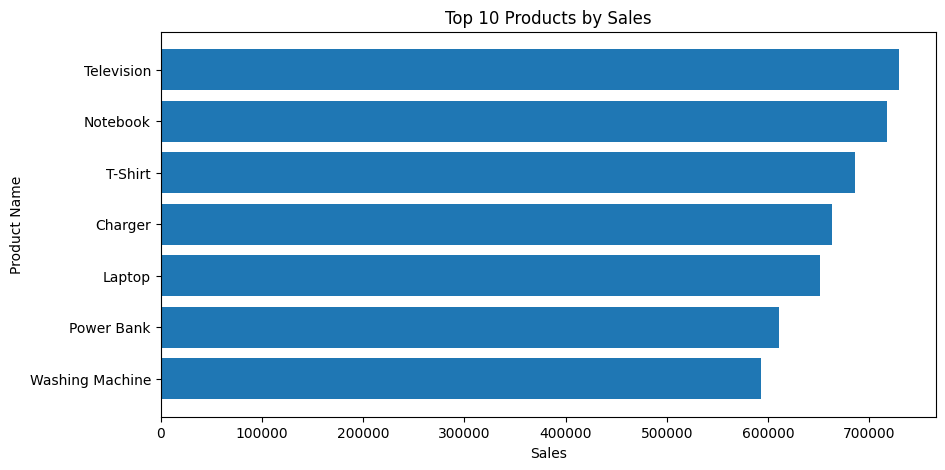

In [21]:
plt.figure(figsize=(10,5))
plt.barh(top_products['Product_Name'], top_products['Sales'])
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales")
plt.ylabel("Product Name")
plt.gca().invert_yaxis() 
plt.show()


In [22]:
state_sales = (
    df.groupby('State')['Sales']
    .sum()
    .reset_index()
    .sort_values(by='Sales',ascending = False)
)
state_sales.head(10)

,State,Sales
3,Maharashtra,2.833925e+08
0,Delhi,1.518682e+08
1,Gujarat,1.442190e+08
4,Tamil Nadu,1.412995e+08
6,West Bengal,1.396323e+08
5,Telangana,1.388165e+08
2,Karnataka,1.381554e+08


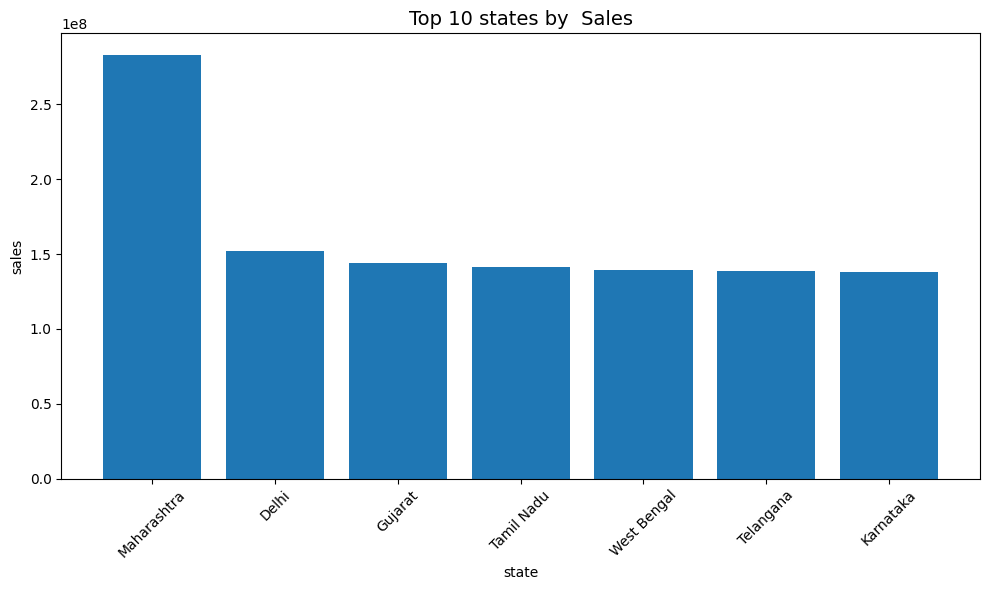

In [23]:
top10_states = state_sales.head(10)

plt.figure(figsize=(10,6))
plt.bar(top10_states['State'], top10_states['Sales'])
plt.title("Top 10 states by  Sales", fontsize=14)
plt.xlabel("state")
plt.ylabel("sales")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

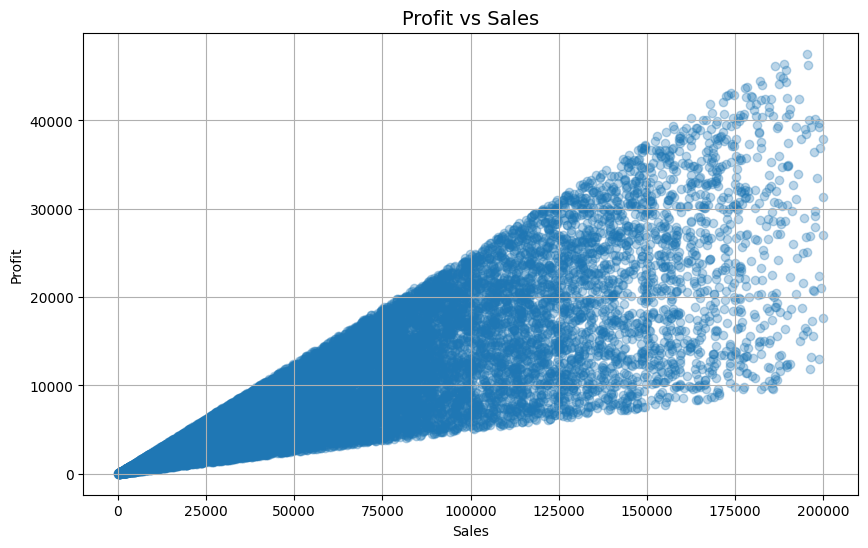

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(df['Sales'], df['Profit'], alpha=0.3)
plt.title("Profit vs Sales", fontsize=14)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid(True)
plt.show()


In [35]:
Payment_counts = df['Payment_Method'].value_counts().reset_index()
Payment_counts.columns = ['Payment_Method','Count']
Payment_counts

,Payment_Method,Count
0,Net Banking,4072
1,Debit Card,4040
2,Upi,3991
3,Credit Card,3975
4,Cash On Delivery,3922


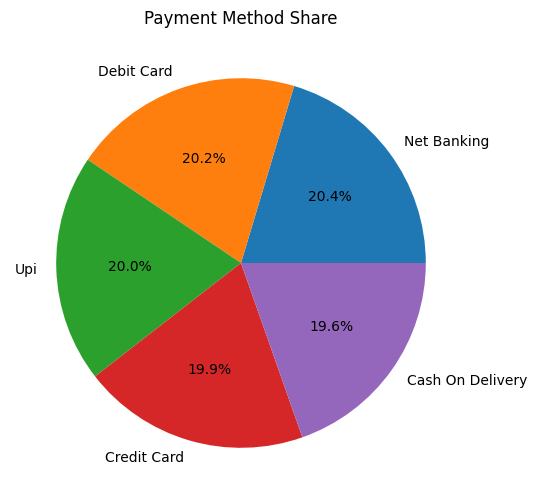

In [36]:
plt.figure(figsize=(6,6))
plt.pie(Payment_counts['Count'], labels=Payment_counts['Payment_Method'], autopct='%1.1f%%')
plt.title("Payment Method Share")
plt.show()


In [37]:
ship_counts = df['Ship_Mode'].value_counts().reset_index()
ship_counts.columns = ['Ship_Mode', 'Count']
ship_counts


,Ship_Mode,Count
0,Standard,6743
1,Same Day,6725
2,Express,6532


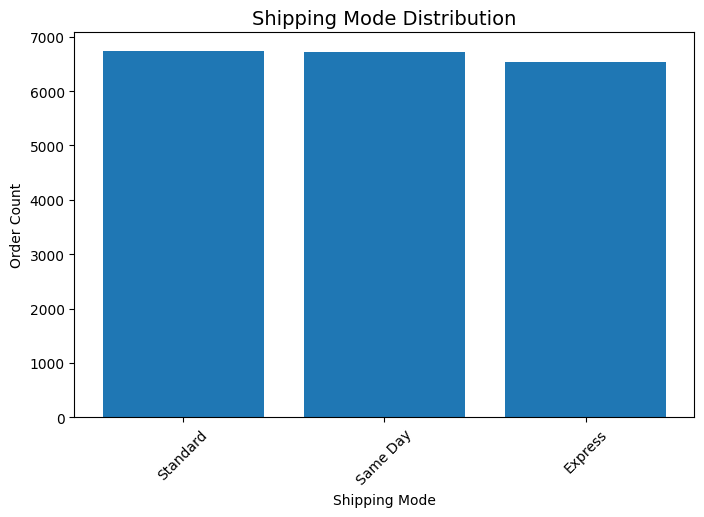

In [38]:
plt.figure(figsize=(8,5))
plt.bar(ship_counts['Ship_Mode'], ship_counts['Count'])
plt.title("Shipping Mode Distribution", fontsize=14)
plt.xlabel("Shipping Mode")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.show()


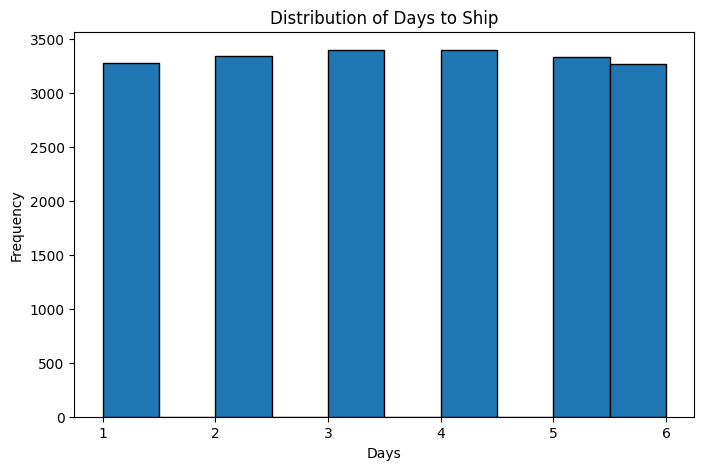

In [39]:
plt.figure(figsize=(8,5))
plt.hist(df['Days_To_Ship'], bins=10, edgecolor='black')
plt.title("Distribution of Days to Ship")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()


In [40]:
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
gender_counts

,Gender,Count
0,Male,10114
1,Female,9886


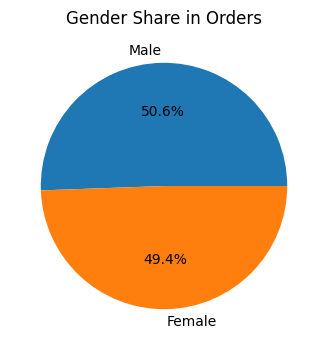

In [44]:
plt.figure(figsize=(4,4))
plt.pie(gender_counts['Count'], labels=gender_counts['Gender'], autopct='%1.1f%%')
plt.title("Gender Share in Orders")
plt.show()


In [46]:
import os

os.makedirs("outputs/charts",exist_ok=True)

os.makedirs("outputs/tables",exist_ok=True)

In [47]:
with open("outputs/kpi_summary.txt","w") as f:
    f.write(f"Total Sales:{total_sales}\n")
    f.write(f"Total Profit:{total_profit}\n")
    f.write(f"Average Profit Margin:{avg_profit_margin}\n")
    f.write(f"Total Orders:{total_orders}\n")
print("KPI SUMMARY SAVED")

KPI SUMMARY SAVED


In [49]:
top_products.to_csv("outputs/tables/top_products.csv", index=False)
state_sales.to_csv("outputs/tables/state_sales.csv", index=False)
category_sales.to_csv("outputs/tables/category_sales.csv", index=False)
Payment_counts.to_csv("outputs/tables/payment_counts.csv", index=False)
gender_counts.to_csv("outputs/tables/gender_counts.csv", index=False)

print("All tables saved")


All tables saved
